## Example 1: Running the ESO 

### Importing libraries

In [1]:
import eso
import numpy as np
import pandas as pd
import os
import json
import pickle
from PIL import Image

In [2]:
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
%matplotlib inline

In [3]:
import librosa.display


In [4]:
# list of submodules available in the eso module
modules = [module for module in dir(eso) if module[0].isalpha()]
modules

['ESO', 'eso', 'genetic_algorithm', 'model', 'utils']

- **result_path** species the folder where the results should be stored. The folder is created if it does not exist.
-  **log_path** is a folder where logs that keep track of the program execution at runtime are stored.
-  **species_folder** is a folder where the input audio files, annotations files necessary to run the program are stored

In [5]:
# Parameters
result_path = '/home/aaron-joel/Documents/Examples/results'
log_path = '/home/aaron-joel/Documents/Examples/logs'
tensorboard_log_dir = f'{log_path}/tensorboard'
species_folder = '/home/aaron-joel/Documents/Examples/SmallData/'


A dictionary or a json file can be used to set the parameters that are used as input. The __settings__ dict is an example of such a file.

In [6]:
settings = {
    "algorithm": {"max_generations": 2},
    "genetic_operator": {
        "mutation_rate": 0.1,
        "crossover_rate": 0.8,
        "reproduction_rate": 0.1,
        "mutation_height_range": 0,
        "mutation_position_range": 10,

    },
    "selection_operator": {"tournament_size": 10},
    "data": {
        "force_recreate_dataset": False,
        "keep_in_memory": False,
        "species_folder" : species_folder,
        "train_size": 0.8,
        "test_size": 0.2,
        "reshuffle": False,
        "positive_class": "gibbon",
        "negative_class": "no-gibbon",
    },
    "preprocessing": {
        "lowpass_cutoff": 2000,
        "downsample_rate": 4800,
        "nyquist_rate": 2400,
        "segment_duration": 4,
        "nb_negative_class": 20,
        "file_type": "svl",
        "audio_extension": ".wav",
        "n_fft": 1024,
        "hop_length": 256,
        "n_mels": 128,
        "f_min": 4000,
        "f_max": 9000,
    },
    "population": {"pop_size": 20},
    "gene": {
        "min_position": 0, 
        "max_position": -1, 
        "min_height": 6, 
        "max_height": 10
    },
    "chromosome": {
        "num_genes": 4,
        "min_num_genes": 4,
        "max_num_genes": 6,
        "lambda_1": 0.6,
        "lambda_2": 0.4,
    },
    "model": {
        "optimizer_name": "adam",
        "loss_function_name": "cross_entropy",
        "num_epochs": 1,
        "batch_size": 8,
        "learning_rate": 0.001,
        "shuffle": True,
        "metric": "f1",
    },
}

In order to train a CNN classifier to identify gibbon calls, in this instance, we need to instantiate an object of the __ESO__ class.
The _run_ method from the __ESO__ class is then use to run this instance and return the _best performing chromosome_.  The _save_ method can be use to save the output of the _best chromosome_.

In [7]:
e = eso.ESO(settings=settings,
            log_level=10, # log_level 10 is use to log Debugging information to the log file
            results_path=result_path,
            log_path=log_path,
            tensorboard_log_dir=tensorboard_log_dir)

2024-04-08 13:39:22 Initializing ESO...


In [8]:
best_chromosome = e.run()

Logging training to /home/aaron-joel/Documents/Examples/logs/tensorboard/20240408-133923
Loaded Baseline results!
Image shape: 128
Minimum Input Shape To Model:[11, 11]
---------------------------
Minimum Image Height: 11
Minimum Number of Genes:4
Minimum Height of one Gene:6
Band Height: None
Images are stacked: False
Calculated Minimum Chromosome Image Shape: 24
---------------------------
Minimum Image shape check passed!
Optimizing...
Creating datasets for chromosomes...
Found already existing shuffled file names! Loading from memory..
The dataset already exists. Skipping...
Loading dataset to set image shape...
Dataset loaded from /home/aaron-joel/Documents/Examples/SmallData/SavedData/unpreprocessed/train
The dataset already exists. Skipping...
The dataset already exists. Skipping...
Data Distribution:{0.0: 3452, 1.0: 3452}
Encoding: {'no-gibbon': array([1., 0.]), 'gibbon': array([0., 1.])}
Creating Population from scratch.
2024-04-08 13:40:20 Starting ESO...
---------- Epoch 0 /

Following training, the _evaluate_ method of the __ESO__ class can be used for _evaluation_.

In [9]:
# Evaluating the model
df = e.evaluate()

Evaluate performance of the baseline model on the testing dataset
load the model ...


Data Loaded from:  /home/aaron-joel/Documents/Examples/SmallData/SavedData/preprocessed/test
Evaluating...


Evaluate performance of the model obtained with the best chromosome on the testing dataset
load the model ...
load the best chromosome ...


              precision    recall  f1-score   support

           0       1.00      0.91      0.95       689
           1       0.74      1.00      0.85       178

    accuracy                           0.93       867
   macro avg       0.87      0.96      0.90       867
weighted avg       0.95      0.93      0.93       867

[[627  62]
 [  0 178]]
Data Loaded from:  /home/aaron-joel/Documents/Examples/SmallData/SavedData/unpreprocessed/test
Evaluating...


Evaluation saved to: /home/aaron-joel/Documents/Examples/results/evaluation_2024-04-08_13-47-35.csv 


              precision    recall  f1-score   support

           0       0.99      0.93      0.96       689
           1       0.78      0.96      0.86       178

    accuracy                           0.94       867
   macro avg       0.89      0.95      0.91       867
weighted avg       0.95      0.94      0.94       867

[[642  47]
 [  7 171]]
------------------
RESULTS
                  F1     CONFUSION  TIME  PARAMS Image Shape  Image Size  \
baseline    0.851675  627 62 0 178  None  132234   (128, 76)        9728   
chromosome  0.863636  642 47 7 171  None   38538   (26, 151)        3926   

            F1_improvement TIME_improvement  PARAMS_improvement  \
baseline               NaN              NaN                 NaN   
chromosome        0.014045              NaN           -0.708562   

            Image Size Improvement  
baseline                       NaN  
chromosome               -0.596423  


In [10]:
df

,F1,CONFUSION,TIME,PARAMS,Image Shape,Image Size,F1_improvement,TIME_improvement,PARAMS_improvement,Image Size Improvement
baseline,0.851675,627 62 0 178,None,132234,"(128, 76)",9728,NaN,NaN,NaN,NaN
chromosome,0.863636,642 47 7 171,None,38538,"(26, 151)",3926,0.014045,NaN,-0.708562,-0.596423


In [11]:
## Checking the content of the result folder
os.chdir(result_path)

In [12]:
## List content of result directory
os.listdir('.')

['eso_chromosome.pth',
 'baseline_cnn_state.pth',
 'baseline.json',
 'eso_chromosome.pkl',
 'population.pkl',
 'evaluation_2024-04-08_12-29-06.csv',
 'all_time_best_chromosome.png',
 'chromosome_cnn_state.pth',
 'current_best_chromosome.png',
 'evaluation_2024-04-08_13-47-35.csv']

The results of the __baseline CNN__ are stored in _baseline.json_

In [13]:
baseline = json.load(open('baseline.json'))
baseline

{'image_shape': [128, 76],
 'baseline_trainable_params': 132234,
 'baseline_metric': 0.9619047619047619,
 'baseline_metric_name': 'F1',
 'minimum_input_shape': [11, 11],
 'full': False}

Let's examine the best eso chromosome

In [14]:
with open('eso_chromosome.pkl', 'rb') as f:
    eso_chromosome = pickle.load(f)

In [15]:
eso_chromosome

Chromosome with 4 genes

In [16]:
print(eso_chromosome)

Chromosome Info:
Number of Genes: 4
Validation F1: 1.0
Trainable parameters: 38538
Fitness: 0.3154045332190305
Genes: Gene 1: (13, 6)
Gene 2: (40, 7)
Gene 3: (56, 6)
Gene 4: (81, 7)




In [17]:
print(eso_chromosome)

Chromosome Info:
Number of Genes: 4
Validation F1: 1.0
Trainable parameters: 38538
Fitness: 0.3154045332190305
Genes: Gene 1: (13, 6)
Gene 2: (40, 7)
Gene 3: (56, 6)
Gene 4: (81, 7)




Let Print's the best chromosome and the overall best chromosome

In [18]:
best_chromosome_img = Image.open('current_best_chromosome.png')
best_chromosome_img.show()

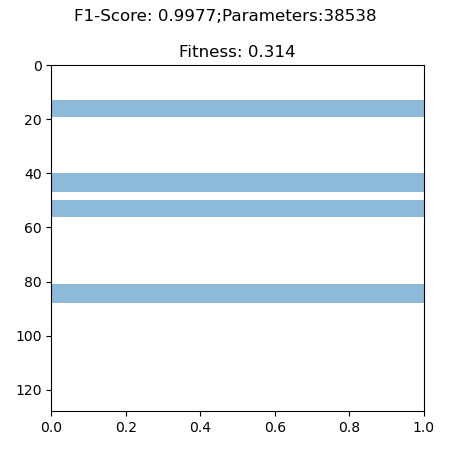

In [19]:
from IPython.display import Image as IPythonImage
IPythonImage(filename='current_best_chromosome.png') 

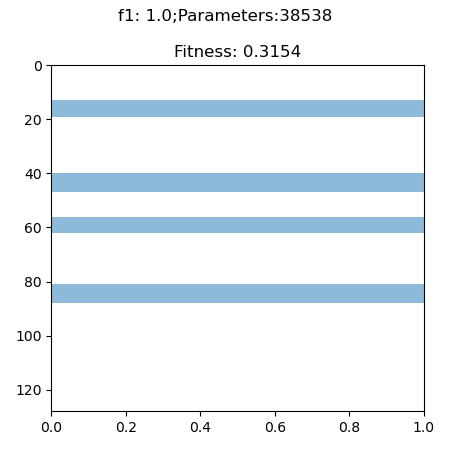

In [20]:
IPythonImage(filename='all_time_best_chromosome.png')

In [21]:
# Let's display a spectrogram with the chromosome band on it 
# Loading the data from files
X_path = f'{species_folder}/SavedData/unpreprocessed/train/X.pkl'
Y_path = f'{species_folder}/SavedData/unpreprocessed/train/Y.pkl'

X = np.load(X_path, allow_pickle=True)
Y = np.load(Y_path, allow_pickle=True)

print(f'The shape of X is: {X.shape}')
print(f'The shape of Y is: {Y.shape}')

The shape of X is: (3452, 128, 151)
The shape of Y is: (3452, 2)


In [35]:
# Let get data for positive call events
X_positive = X[np.where(Y[:, 1] == 1)[0]]
X_negative = X[np.where(Y[:, 1] == 0)[0]]
X_positive.shape, X_negative.shape

((1726, 128, 151), (1726, 128, 151))

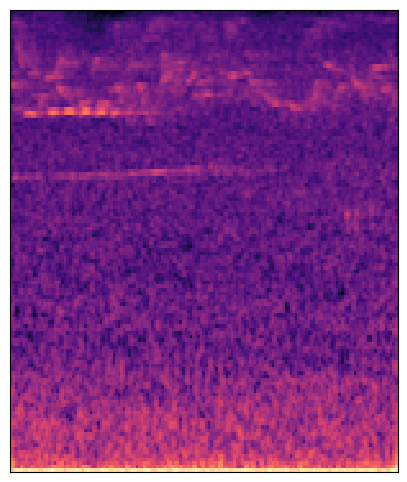

In [41]:
# Get out one spectrogram from X_positive and display it with librosa
fig, ax = plt.subplots(1, 1, figsize=(5, 6))
spec = X_positive[10, :, :]
librosa.display.specshow(spec, ax=ax)
plt.show()

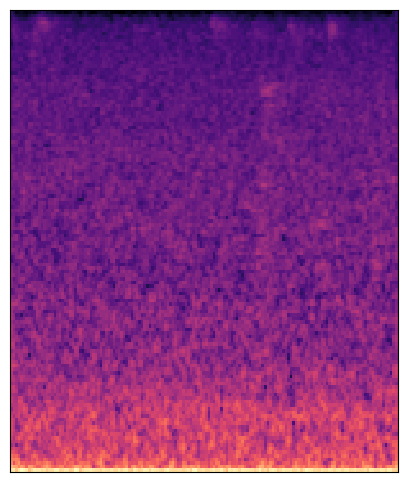

In [40]:
# Get out one spectrogram from X_positive and display it with librosa
fig, ax = plt.subplots(1, 1, figsize=(5, 6))
spec_no = X_negative[10, :, :]
librosa.display.specshow(spec_no, ax=ax)
plt.show()